# Bengkel Koding - ADS Hungarian Data

## Preparation

Melakukan instalasi pandas dan numpy jika belum tersedia

In [1]:
# !python -m pip install --upgrade pip
# %pip install pandas numpy xgboost imbalanced-learn seaborn

Import semua modul yang diperlukan untuk membuka data dan memproses data

In [2]:
import pandas as pd
import re
import numpy as np
import itertools

## Load the data

Tentukan dimana lokasi file "hungarian.data" lalu masukkan ke variabel (dir)

In [3]:
dir = "hungarian.data"

Buka file dengan encoder "Latin1" dan simpan data pada variabel sementara (lines)

In [4]:
with open(dir, encoding="Latin1") as file:
  lines = [line.strip() for line in file]

Kemudian lakukan iterasi untuk semua baris data yang ada

In [5]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

Ubah data yang tersimpan pada "data" menjadi format Data Frame pandas

In [6]:
df = pd.DataFrame.from_records(data)

Lakukan pengecekan dengan .head() untuk melihat 5 data paling atas

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


## Data Preprocessing

Melihat informasi detail data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dilakukan slicing/pemotongan data paling awal dan paling akhir karna tidak termasuk ke dalam data yang akan diolah

In [9]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

Ubah tipe data "data" yang sebelumnya adalah **object** menjadi **float** supaya dapat diolah lebih lanjut

In [10]:
df = df.astype(float)

Lakukan pengecekan dan terlihat bahwa tipe datanya sekarang adalah **float**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

Karena pada deskripsi dataset dijelaskan bahwa **-9.0** adalah **Null** maka ubah semua nilai -9.0 menjadi NaN (np.nan tipe data numpy) supaya tidak tercampur pada saat kalkulasi

In [12]:
df.replace(-9.0, np.nan, inplace=True) #inplace set True untuk merubah langsung pada data aslinya

Cek berapa jumlah Null yang ada di dalam data

In [13]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

Cek juga secara langsung isi datanya

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


Sesuai dengan deskripsi dataset, tidak semua data diperlukan. Hanya 14 data saja yang penting dan memungkinkan berpengaruh tinggi pada model akhir nya nanti. Maka filter/pilih data dengan cara berikut

In [15]:
# Nomor tidak sesuai dengan nomor pada desc karena akses dilakukan dengan index (mulai dari 0) dan juga sudah dilakukan slicing di depannya
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [16]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


Ubah nama atribut/kolom sesuai dengan nama aslinya untuk mempermudah saat pengolahan data

In [17]:
# Atur dulu nama setiap kolomnya
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

In [18]:
# Ubah langsung pada datanya dengan syntax berikut
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\dimas\AppData\Local\Temp\ipykernel_12940\319430428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Cek dan terlihat bahwa nama atribut/kolom sudah berubah

In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [20]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
Name: count, dtype: int64

Cek berapa jumlah record yang null pada semua atribut yang telah dipilih

In [21]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Setelah dicek ternyata atribut 'ca', 'slope', dan 'thal' memiliki jumlah Null yang sangat banyak melebihi 70%. Oleh karena itu akan lebih bijak jika dihapus (drop) saja dibandingkan dilakukan manipulasi data.

In [22]:
col_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(col_to_drop, axis=1)

Untuk atribut yang missing value/Null nya hanya sedikit bisa dilakukan manipulasi data, pada kasus ini akan dilakukan pengisian dengan nilai rata-rata.

In [23]:
# Simpan nilai semua kolmnya pada variabel sementara dan hapus nilai Null nya
meanTBPS    = df_selected['trestbps'].dropna()
meanChol    = df_selected['chol'].dropna()
meanfbs     = df_selected['fbs'].dropna()
meanRestCG  = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang   = df_selected['exang'].dropna()

# Ubah menjadi tipe data float
meanTBPS    = meanTBPS.astype(float)
meanChol    = meanChol.astype(float)
meanfbs     = meanfbs.astype(float)
meanRestCG  = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang   = meanexang.astype(float)

# Hitung nilai rata-rata dan lakukan pembulatan
meanTBPS    = round(meanTBPS.mean())
meanChol    = round(meanChol.mean())
meanfbs     = round(meanfbs.mean())
meanRestCG  = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang   = round(meanexang.mean())

In [24]:
print(meanTBPS, meanChol, meanfbs, meanRestCG, meanthalach, meanexang)
# 133 251 0 0 139 0

133 251 0 0 139 0


Atur terlebih dahulu kolom mana saja yang akan diubah nilai null record nya

In [25]:
fill_values = {
    'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
    'thalach': meanthalach,
    'exang': meanexang,
    'restecg': meanRestCG
}

Ubah semua nilai null dengan nilai rata-rata yang didapatkan sebelumnya menggunakan syntax berikut

In [26]:
dfClean = df_selected.fillna(value=fill_values)

Setelah dicek sudah terlihat bahwa semua atribut/kolom tidak ada yang null

In [27]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [28]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [29]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Kemudian dilakukan penghapusan nilai duplikat untuk data yang nilai record nya sama

In [30]:
# Cek apakah ada data yang duplikat
dup_rows = dfClean.duplicated()
dfClean[dup_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [31]:
# Cek lagi apakah benar-benar duplikat
dfClean[dfClean.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Setelah dihapus, ketika dicek ulang maka tidak ada yang muncul

In [32]:
# Hapus record yang duplikat
dfClean = dfClean.drop_duplicates()
print("Row duplicate:")
dfClean[dfClean.duplicated(keep=False)]

Row duplicate:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


Cek data setelah dimuat, dipilih, dan dibersihkan

In [33]:
dfClean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,133.0,308.0,0.0,1.0,139.0,0.0,2.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,0.0


Mulai meninjau label/output/result untuk setiap record yang disimpan pada atribut bernama "target". 0 mengindikasikan bahwa tidak ada penyakit jantung dan 4 mengindikasikan tingkat penyakit jantung yang tinggi, sehingga semakin tinggi nilai (target) semakin parah sakitnya, berlaku sebaliknya.

In [34]:
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

### Melihat Korelasi Antar Fitur

In [35]:
# Mengimport library untuk memvisualisasikan data
import seaborn as sns
import matplotlib.pyplot as plt

Dilakukan pengecekan korelasi antar atribut/fitur dalam bentuk tabel

In [36]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


Visualisasi korelasi data menggunakan heatmap matplotlib

<Axes: >

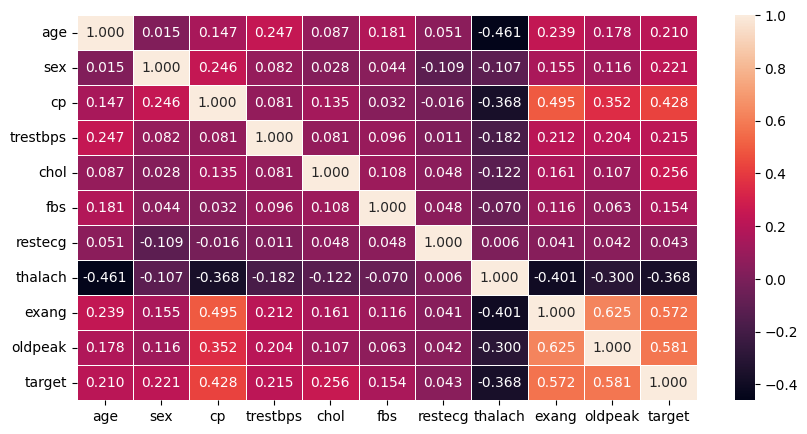

In [37]:
cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt='.3f')

### Pemisahan data dengan label

Setelah data dibersihkan maka tahap selanjutnya adalah memisahkan data untuk training dengan output/labelnya. Dimana "x" adalah data training dan "y" adalah label/output

In [38]:
x = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:,-1]

Setelah itu dilakukan pengecekan untuk semua data dengan setiap outputnya dimana setelah dilakukan pengecekan ternyata data untuk output 0.0 (sehat) memiliki jumlah yang jauh lebih banyak dibandingkan untuk data lainnya (1,2,3,4), hal seperti ini biasa disebut imbalance.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

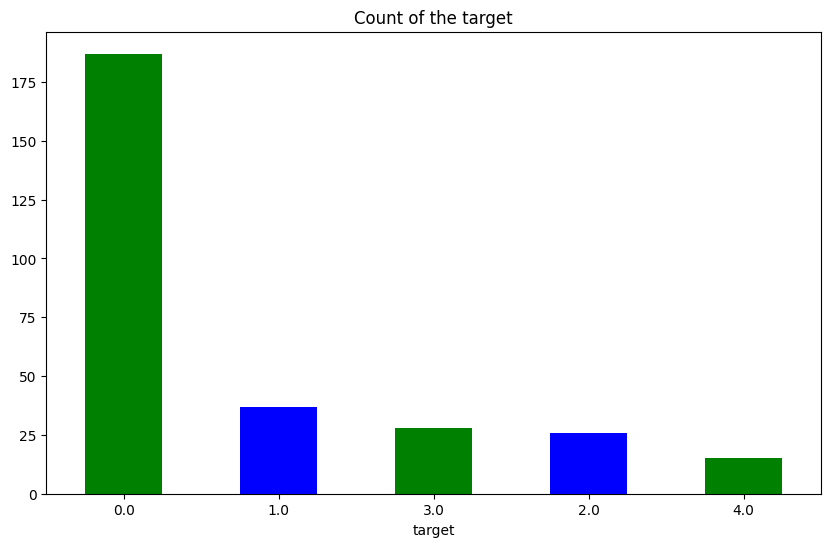

In [39]:
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)

### Manipulasi data
Dikarenakan tidak seimbangnya data yang dimiliki sekarang, maka akan dilakukan oversampling dimana data yang memiliki jumlah sedikit akan ditambah dengan data hasil manipulasi. Pada kasus ini akan digunakan teknik SMOTE

In [40]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

Disiapkan algoritma SMOTE untuk melakukan oversampling, dimana untuk data barunya disimpan pada variabel baru

In [41]:
# Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)

Selesai dilakukan resample data, maka setelah dicek ulang menggunakan matplotlib terlihat bahwa semua jumlah data sudah mengikuti jumlah data yang sebelumnya memiliki jumlah paling banyak

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(0.0,)'),
  Text(1, 0, '(1.0,)'),
  Text(2, 0, '(2.0,)'),
  Text(3, 0, '(3.0,)'),
  Text(4, 0, '(4.0,)')])

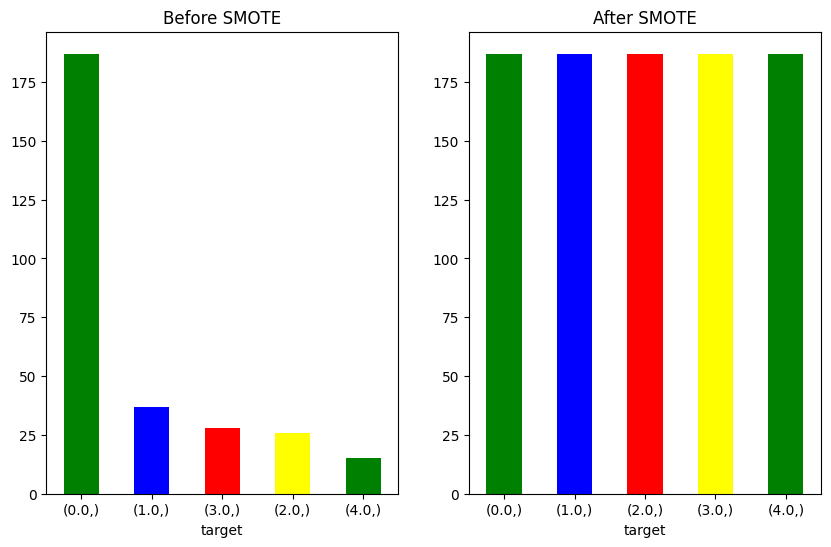

In [42]:
plt.figure(figsize=(12,4))
new_df1 = pd.DataFrame(data=y)

plt.subplot(1,2,1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Before SMOTE")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("After SMOTE")
plt.xticks(rotation=0)

### Data Normalization
Data yang dimiliki sekarang masih memiliki rentan nilai yang berjauhan. Nilai yang berjauhan akan berdampak kurang efektif pada saat melakukan optimasi dan juga saat melakukan training.

Data yang masih belum dinormalisasi dapat dilihat dibawah. Terlihat jelas jika dilihat pada atribut "std" nilai paling kecil saja menyentuh dibawah 0 sedangkan disana terdapat juga nilai 65, perbedaan nilai disini sangatlah jauh

In [43]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada kasus ini akan digunakan algoritma MinMaxScalar oleh sklearn untuk melakukan normalisasi

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_smote_resampled_normal = scaler.fit_transform(x_smote_resampled)
# print(len(x_smote_resampled_normal))

Dilakukan pengecekan setelah normalisasi

In [45]:
dfcek1 = pd.DataFrame(x_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split data untuk data training dan data validation
Pada kasus ini akan dibuat 2 jenis data untuk dilakukan training dimana terdapat data sebelum dilakukan normalisasi dan sesudahnya. Untuk kedua data tersebut akan dibagi 80:20

In [46]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled) 

X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(x_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)
print(X_test_normal)

[[0.58031722 1.         1.         ... 0.29921722 0.5788649  0.        ]
 [0.65828908 1.         1.         ... 0.3139823  1.         0.00224778]
 [0.57894737 0.11291358 0.70430453 ... 0.547492   0.88708642 0.        ]
 ...
 [0.42909552 1.         1.         ... 0.47347051 1.         0.41865185]
 [0.52450516 0.46559802 1.         ... 0.13952596 1.         0.21376079]
 [0.39473684 1.         0.         ... 0.67592593 0.         0.        ]]


## Model Training
Dalam penelitian ini, kita akan menilai bagaimana perbedaan hasil akurasi model maka akan dilakukan pengujian terhadap 3 kasus yaitu tanpa normalisasi, dengan normalisasi, dan dilakukan fine tuning + normalisasi. Untuk setiap kasusnya akan digunakan 3 jenis model (ensemble learning) yaitu KNN, Random Forest, dan XGBoost

Untuk mempermudah dalam melakukan evaluasi hasil training model, maka akan dibuat sebuah fungsi untuk mencetak hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. 

In [47]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    ps = precision_score(Y_test, Y_pred, average='weighted')

    met_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }
    print(met_dict)

### Tanpa Normalisasi

#### KNN
Digunakan nilai neighbors 3

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

Pembuatan model

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Melihat bagaimana akurasinya

In [50]:
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [51]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


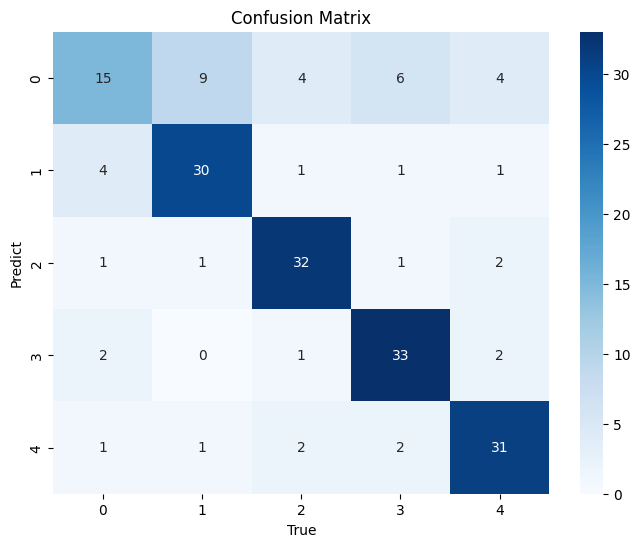

In [52]:
cm = confusion_matrix(y_test, y_pred_knn) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

#### Random Forest
Digunakan jumlah 100 pohon kemungkinan

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [55]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


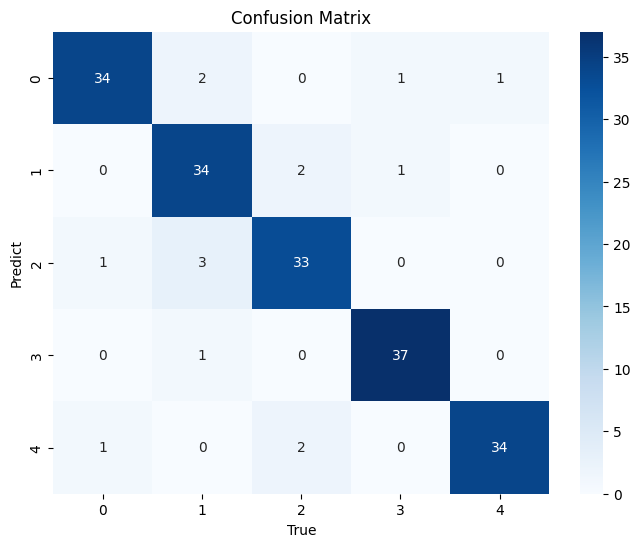

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

#### XGBoost

In [57]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42) 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [59]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


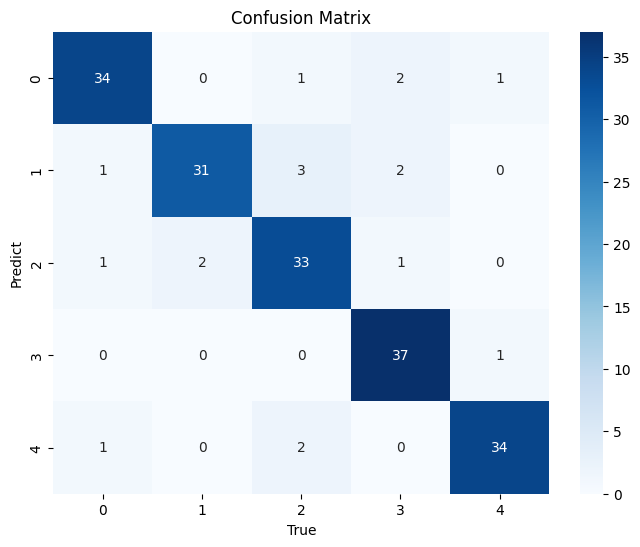

In [60]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

## Simpan model
Dilakukan penyimpanan model sebelum dilakukan normalisasi karena pada template streamlit tidak dilakukan normalisasi untuk setiap datanya

In [61]:
import os
import pickle

# Check if the directory exists
if not os.path.exists('models'):
    os.makedirs('models')

# Assuming knn_model, rf_model, and xgb_model are your models
with open('models\\knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

with open('models\\rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('models\\xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

### Dengan Normalisasi

#### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [63]:
knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [65]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


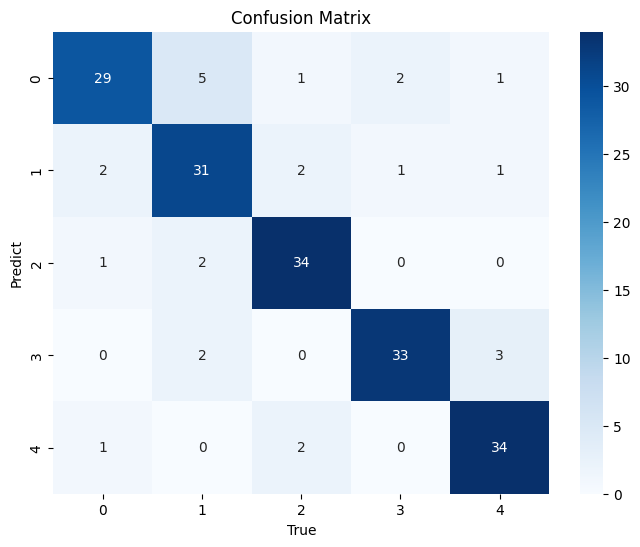

In [66]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

#### Random Forest

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rf_model.predict(X_test_normal)
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [69]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


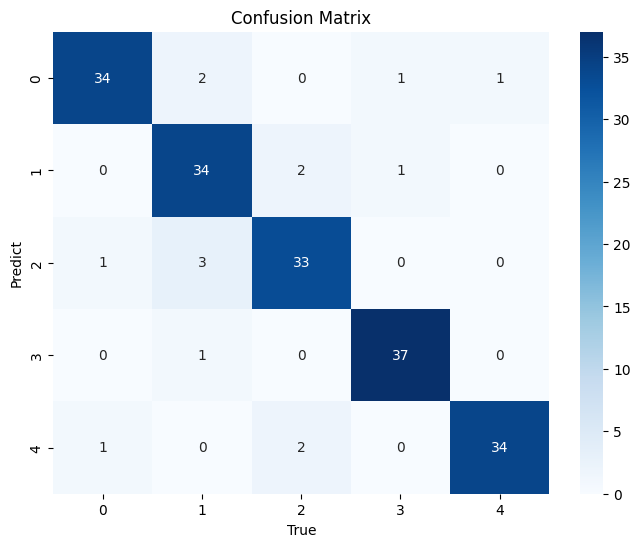

In [70]:
cm = confusion_matrix(y_test_normal, y_pred_rf) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

In [71]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [73]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


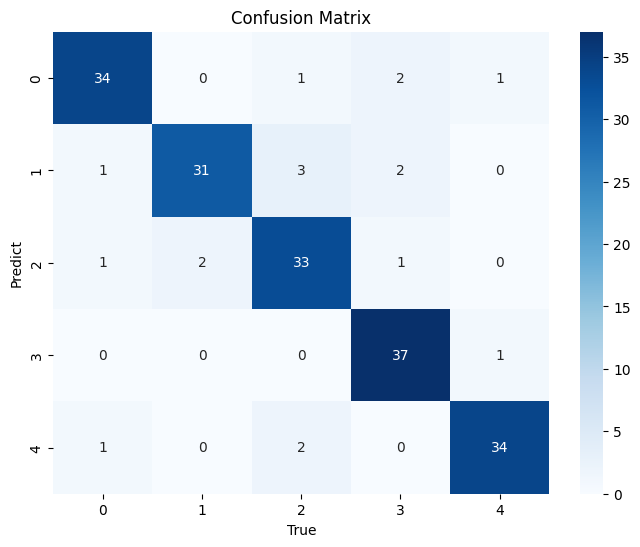

In [74]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

### Fine Tune dan Normalisasi

Dalam kasus ini akan disertakan sebuah param_grid untuk memberi beberapa pilihan hyperparameter yang kemudian akan dicari mana yang terbaik menggunakan RandomizedSearchCV

#### KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import RandomizedSearchCV

In [76]:
knn_model = KNeighborsClassifier() 
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal) 
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 42, 'algorithm': 'auto'}


In [77]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [78]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.93}


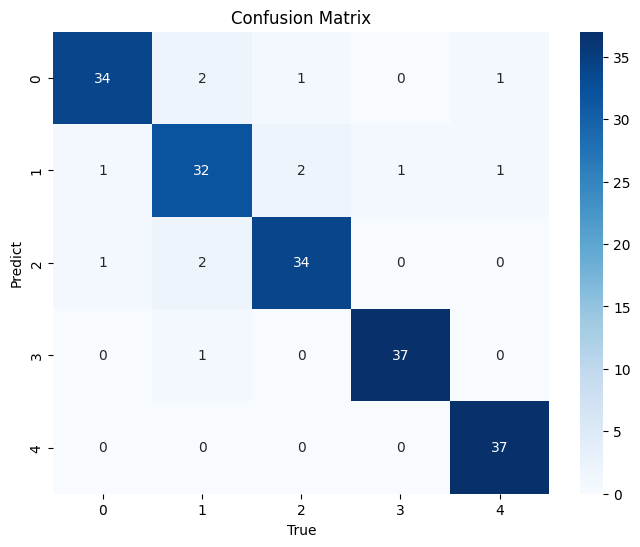

In [79]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

#### Random forest

In [80]:
rf_model = RandomForestClassifier()

param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1) 
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

d:\bengkod_12565\.venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [81]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.85      0.89      0.87        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [82]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precision score': 0.916}


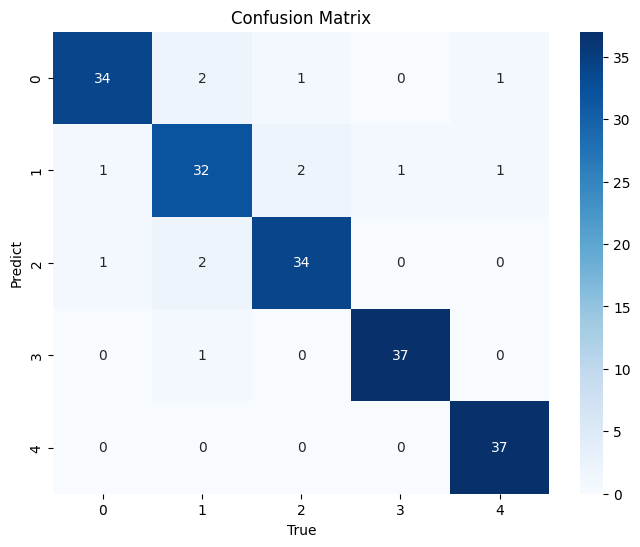

In [83]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

#### XGBoost

In [84]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8]
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal) 
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [85]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.81      0.86        37
         2.0       0.87      0.89      0.88        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [86]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


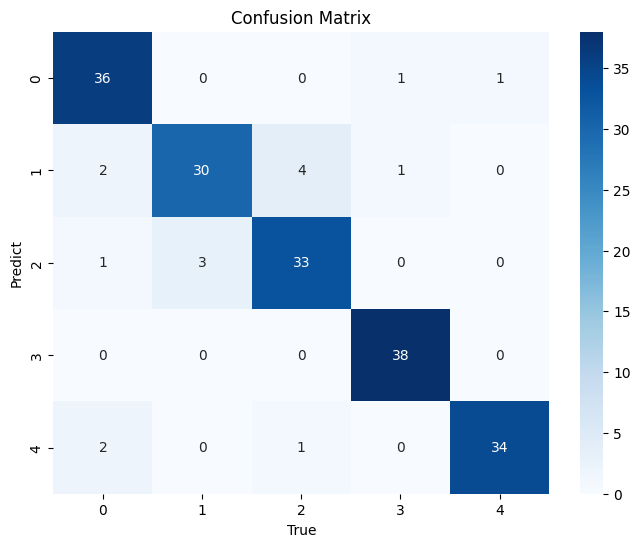

In [87]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()

## Evaluasi Model

In [88]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 
    'Accuracy': [accuracy_knn_smote*100,accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


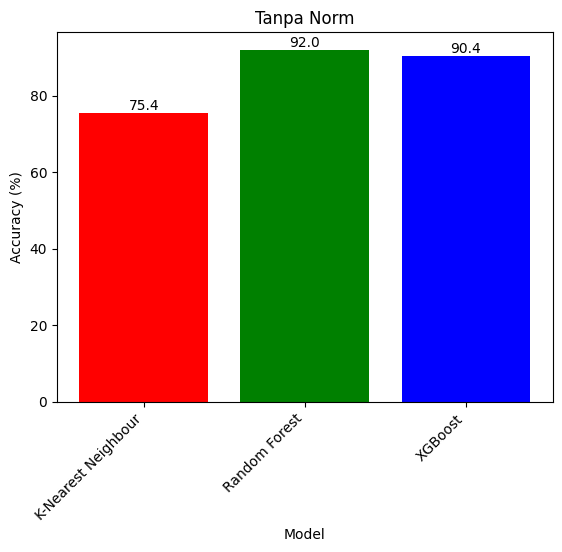

In [89]:
# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)') 
plt.title('Tanpa Norm')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()

In [90]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


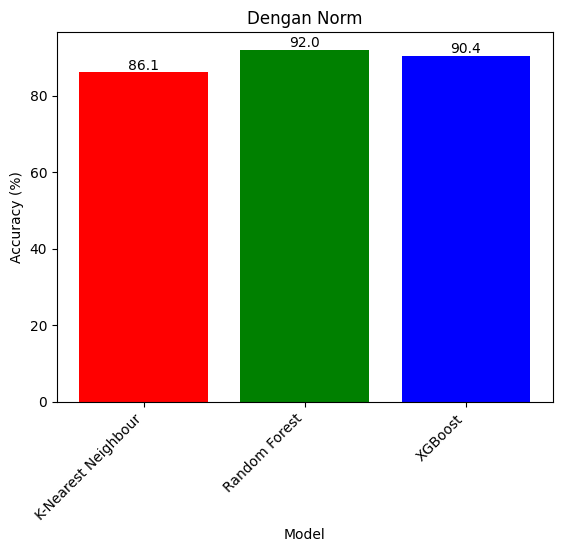

In [91]:
# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Dengan Norm')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()

In [92]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,91.4
2,XGBoost,91.4


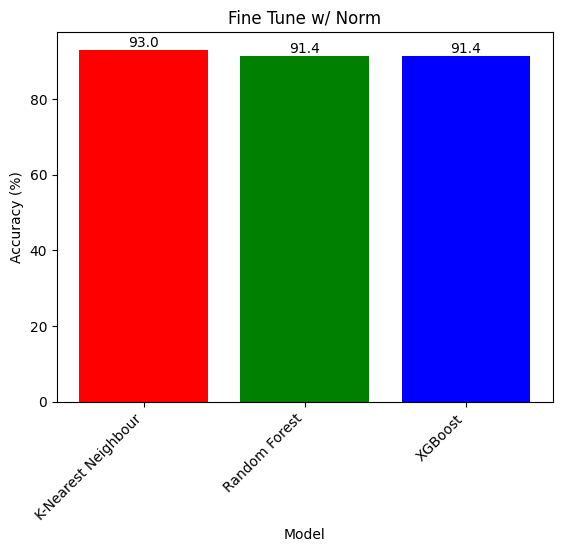

In [93]:
# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Fine Tune w/ Norm')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()


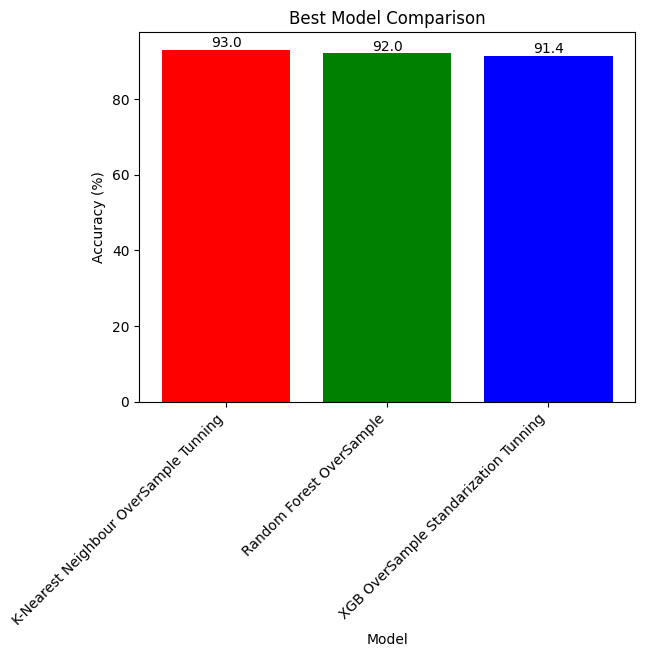

In [94]:
# Data frame
model_compBest = pd.DataFrame({
'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample', 'XGB OverSample Standarization Tunning'],
'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_Tun*100]
})

# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()

## Simpan Model Format .pkl

In [95]:
# import os
# import pickle

# # Check if the directory exists
# if not os.path.exists('models'):
#     os.makedirs('models')

# # Assuming knn_model, rf_model, and xgb_model are your models
# with open('models\\knn_model.pkl', 'wb') as file:
#     pickle.dump(knn_model, file)

# with open('models\\rf_model.pkl', 'wb') as file:
#     pickle.dump(rf_model, file)

# with open('models\\xgb_model.pkl', 'wb') as file:
#     pickle.dump(xgb_model, file)
    

## Kesimpulan

Dari hasil penelitian yang saya lakukan, setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost, serta menerapkan berbagai strategi penanganan data seperti random over sampling SMOTE untuk mengatasi imbalanced data, RandomSearchCV untuk penyesuaian parameter, dan normalisasi data, dapat disimpulkan bahwa:

1. Dalam klasifikasi dengan menggunakan Random Over Sampling SMOTE, model KNN mencapai akurasi sebesar 75.4%, sementara model Random Forest dan XGBoots masing-masing mencapai akurasi 92% dan 90.4%.

2. Ketika data sudah dinormalisasi dan diterapkan Random Over Sampling SMOTE, akurasi model KNN meningkat menjadi 86.1%, sementara model Random Forest dan XGBoots tetap pada tingkat akurasi sebelumnya, yaitu 92% dan 90.4%.

3. Pada klasifikasi dengan data yang telah melalui tunning menggunakan RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE, ketiga model KNN, Random Forest, dan XGBoost memiliki akurasi yang sama yaitu 92%

Dalam penelitian saya SMOTE memiliki akurasi paling baik dibandingkan algoritma oversampling yang lain.